In [438]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import random

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False

In [439]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]


# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

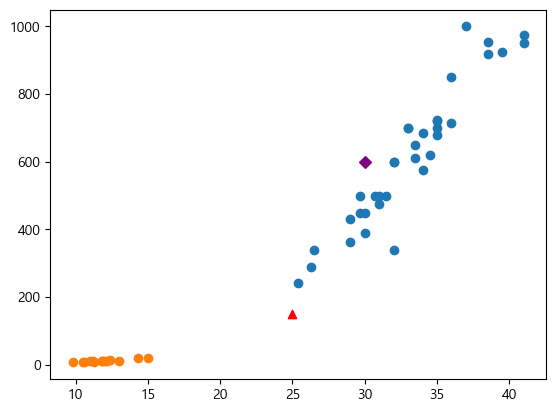

In [440]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(30,600, marker='D',color='purple')
plt.scatter(25,150, marker='^',color='r')

In [441]:
len(bream_length) # 35 도미데이터
len(smelt_length) # 14 빙어데이터

14

In [442]:
# 데이터의 전처리 과정
# train_input, test_input, train_target, test_target
# length data ->합치기 (bream_length,bream_length)
# weight data ->합치기 (bream_weight,smelt_weight)

### datas = length, weight 합치기
#  train_input, test_input, train_target, test_target


In [443]:
length_data=bream_length +smelt_weight
print(length_data)

weight_data = bream_weight+smelt_weight
print(weight_data)
# datas= []
# for i in length_data:
#      datas.append(i)
#      for j in weight_data:
#           datas.append(j)
          
# print(datas)
results = [1]*35+[0]*14 # 1도미 0 빙어

# zip() :반복해서 각각 list 데이터를 1개씩 뽑아서 전달해줌
# datas =[[l,w,r] for l,w,r in zip(length_data,weight_data,results)]
datas =[[l,w] for l,w in zip(length_data,weight_data)]
df = pd.DataFrame(datas)
# datas
# results

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [444]:
# datas, results 49개를 train_input 35개 train_target 35개
# random 함수를 사용해서 49개 중 35개 데이터는 train_input 14개. train_target 14개
# 14개는 test_input , test_target에 입력
random.shuffle(results)
print(results)
df = pd.DataFrame(datas)
df.head()

# 랜덤숫자생성
idx = [i for i in range(49)]
random.shuffle(idx)
# idx


[1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0]


In [445]:
#  데이터 전처리 - 파이썬 random 함수 사용
# for 문을 사용해서, 35개, 14개 분리해서 출력 datas, results
train_input = [datas[i] for i in idx[:35]]     #35
test_input =  [datas[i] for i in idx[35:]]     #14
train_target =  [results[i] for i in idx[:35]] #35 
test_target =  [results[i] for i in idx[35:]]  #14


In [446]:
#  데이터 전처리 -pandas 사용
# train_input = df.iloc[idx[:35],:]
# test_input = df.iloc[idx[35:],:]
# train_target = df.iloc[idx[:35],1]
# test_target = df.iloc[idx[35:],1]

In [447]:
datas[:35]
datas[35:]

[[6.7, 6.7],
 [7.5, 7.5],
 [7.0, 7.0],
 [9.7, 9.7],
 [9.8, 9.8],
 [8.7, 8.7],
 [10.0, 10.0],
 [9.9, 9.9],
 [9.8, 9.8],
 [12.2, 12.2],
 [13.4, 13.4],
 [12.2, 12.2],
 [19.7, 19.7],
 [19.9, 19.9]]

In [448]:
df_train = pd.DataFrame(train_input)
df_train.head(1)
df_test = pd.DataFrame(test_input)
df_test.head(1)
df_train[0]

0     38.5
1     31.0
2     33.0
3     37.0
4     32.0
5     35.0
6     34.0
7     29.7
8     19.7
9     41.0
10    19.9
11     8.7
12    36.0
13    29.0
14    36.0
15    30.7
16    33.0
17    13.4
18     7.5
19    35.0
20    30.0
21    26.3
22     6.7
23    29.7
24    12.2
25    31.0
26    39.5
27    10.0
28    33.5
29    12.2
30     7.0
31    26.5
32    30.0
33     9.8
34    32.0
Name: 0, dtype: float64

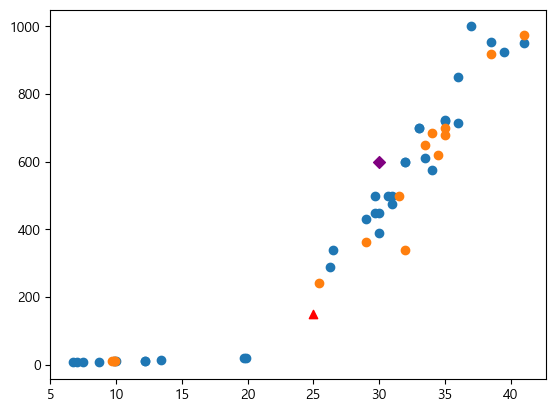

In [449]:
plt.scatter(df_train[0],df_train[1])
plt.scatter(df_test[0],df_test[1])
plt.scatter(30,600, marker='D',color='purple')
plt.scatter(25,150, marker='^',color='r')

In [450]:
# 길이 30, 무게 600인 고기 무엇인지 판단
data=[30,600] # 1
data1 = [25,150] # 1

In [451]:
# 데이터 학습하기
from sklearn.neighbors import KNeighborsClassifier
# clf = svm.SVC()
clf = KNeighborsClassifier()
clf.fit(train_input,train_target)
# 데이터 예측하기
pre = clf.predict([data1])
print("예측데이터 : ",pre)

예측데이터 :  [1]


In [452]:
# train_input 몇 번째 index 데이터를 사용했는지 알려줌
distances,indexs = clf.kneighbors([[25,150]])

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

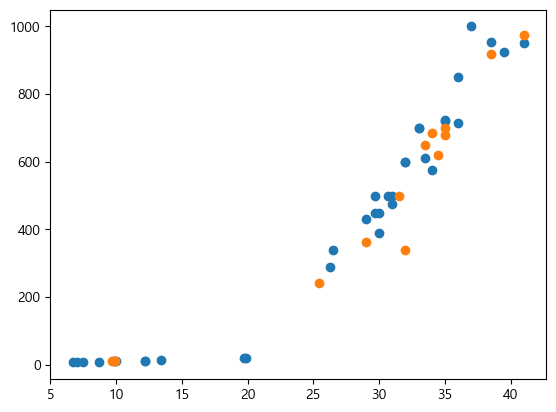

In [455]:
plt.scatter(df_train[0],df_train[1])
plt.scatter(df_test[0],df_test[1])
plt.scatter(df_train.iloc[indexs,0],df_train.iloc[indexs,1])
plt.scatter(30,600, marker='D',color='purple')
plt.scatter(25,150, marker='^',color='r')

In [ ]:
score = clf.score(test_input,test_target)
print("정답률 : ",score)

정답률 :  0.7142857142857143
